In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing the Dataset

In [2]:
df=pd.read_csv("Telecom_customer_churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The above dataset has 7043 rows and 21 columns.
As churn is the output variable its a classification problem all other variables are input variables.
We have almost all the variables in the categorial format.
We have to predict the highest Churners.


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Tells us about the name of each columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Gives us the information about the data types the non null values in each row.

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Tells us about the data types of each columns.

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Tells us about the null values of each column.

# Univariant, Bivariant, Multivariant Analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

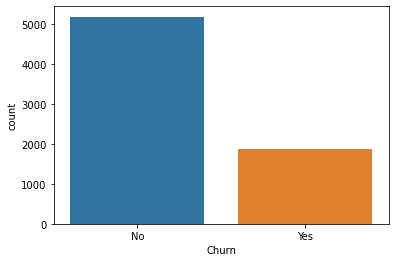

In [8]:
sns.countplot(df['Churn'])

Tells us about the count of each category in the Churn column.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

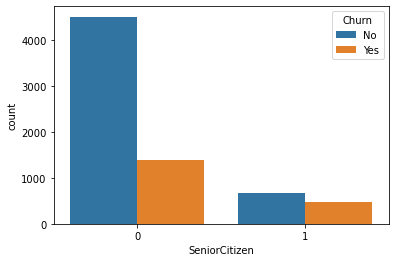

In [9]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

0 means person is not a senior citizen 1 means person is a senior citizen and the persons who are not senior citizen are the highest churners.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

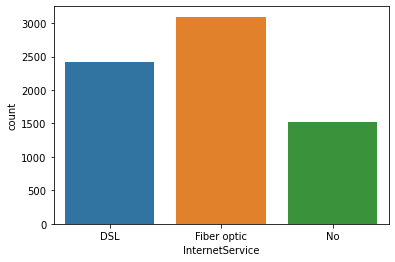

In [10]:
sns.countplot(df['InternetService'])

Internet service has 3 categories fiber optic has the higest count.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

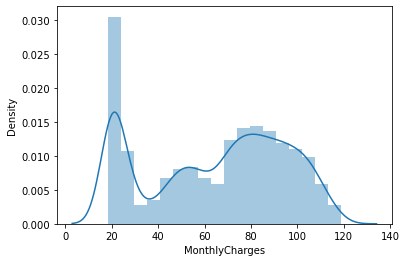

In [11]:
sns.distplot(df['MonthlyCharges'])

From the above plot we can see that the monthly charges are normally distributed.

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

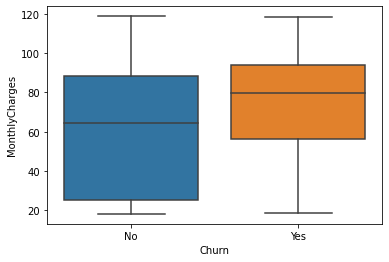

In [12]:
sns.boxplot(df['Churn'],df['MonthlyCharges'])

Persons who are paying the average monthly charges of around 80/- are churned where as the customers with the average of monthly charges 65/- are not churned.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

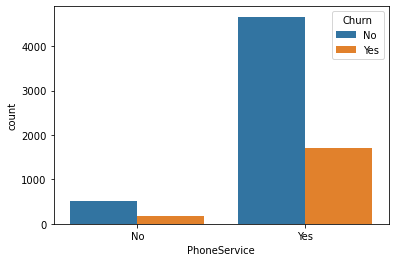

In [159]:
sns.countplot(x='PhoneService',hue='Churn',data=df)

Persons using the phone service are highly churned.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

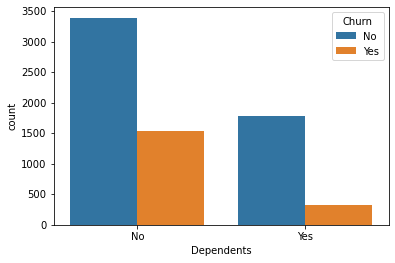

In [160]:
sns.countplot(x='Dependents',hue='Churn',data=df)

Persons having no dependents are highly churned.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

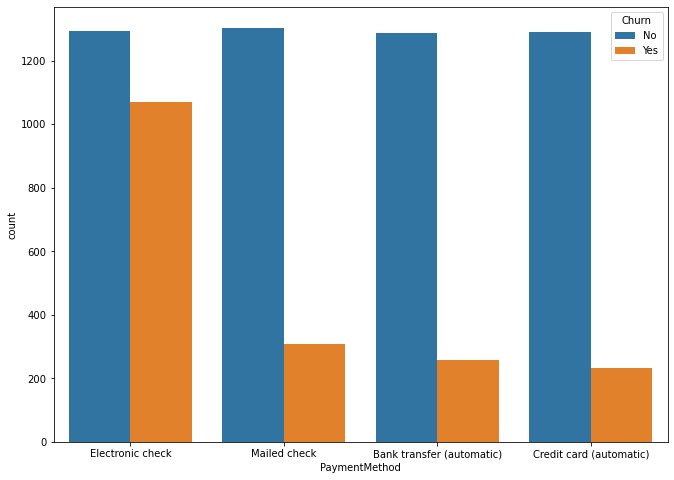

In [17]:
plt.figure(figsize=(11,8))
sns.countplot(x='PaymentMethod',hue='Churn',data=df)

Persons with the electronic check payment method are highly churned.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

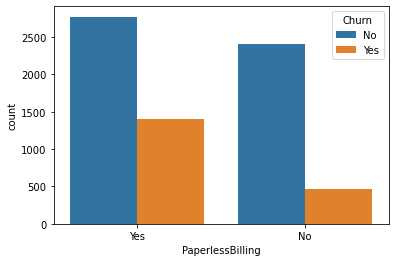

In [163]:
sns.countplot(x='PaperlessBilling',hue='Churn',data=df)

Persons usually who prefer paperless billing are highly churned.

<AxesSubplot:xlabel='Contract', ylabel='count'>

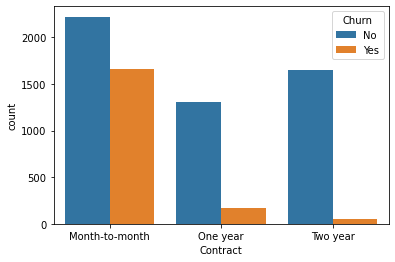

In [19]:
sns.countplot(x='Contract', hue='Churn', data=df)

Persons renewing there contracts monthly are highly churned.

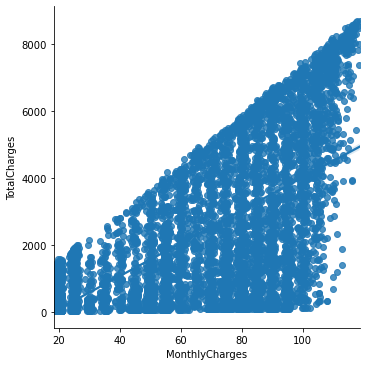

In [229]:
sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges')

We could see that monthly charges and total charges are linerly propotional to each other.

# Data Cleaning/Preprocessing

In [165]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

As the total charges column is in object format we need to convert it into numeric format 

In [166]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After converting the total charges into numeric form we could see some of the rows have missing values

In [167]:
df.dropna(inplace=True)

Droping the missing values

In [168]:
df.shape

(7032, 21)

In [169]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Feature Engineering

In [170]:
df.drop('customerID',axis=1,inplace=True) #as customer id doesnt give important info we can drop the colum.

In [171]:
df.shape

(7032, 20)

# Label Encoding

In [172]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
name=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for val in name:
    df[val]=le.fit_transform(df[val].astype(str))


In [173]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


To furthur process the data we need to convert all the categorial data into numeric data we will be using label encoding.

gender                 AxesSubplot(0.125,0.772143;0.0824468x0.107857)
SeniorCitizen       AxesSubplot(0.223936,0.772143;0.0824468x0.107857)
Partner             AxesSubplot(0.322872,0.772143;0.0824468x0.107857)
Dependents          AxesSubplot(0.421809,0.772143;0.0824468x0.107857)
tenure              AxesSubplot(0.520745,0.772143;0.0824468x0.107857)
PhoneService        AxesSubplot(0.619681,0.772143;0.0824468x0.107857)
MultipleLines       AxesSubplot(0.718617,0.772143;0.0824468x0.107857)
InternetService     AxesSubplot(0.817553,0.772143;0.0824468x0.107857)
OnlineSecurity         AxesSubplot(0.125,0.642714;0.0824468x0.107857)
OnlineBackup        AxesSubplot(0.223936,0.642714;0.0824468x0.107857)
DeviceProtection    AxesSubplot(0.322872,0.642714;0.0824468x0.107857)
TechSupport         AxesSubplot(0.421809,0.642714;0.0824468x0.107857)
StreamingTV         AxesSubplot(0.520745,0.642714;0.0824468x0.107857)
StreamingMovies     AxesSubplot(0.619681,0.642714;0.0824468x0.107857)
Contract            

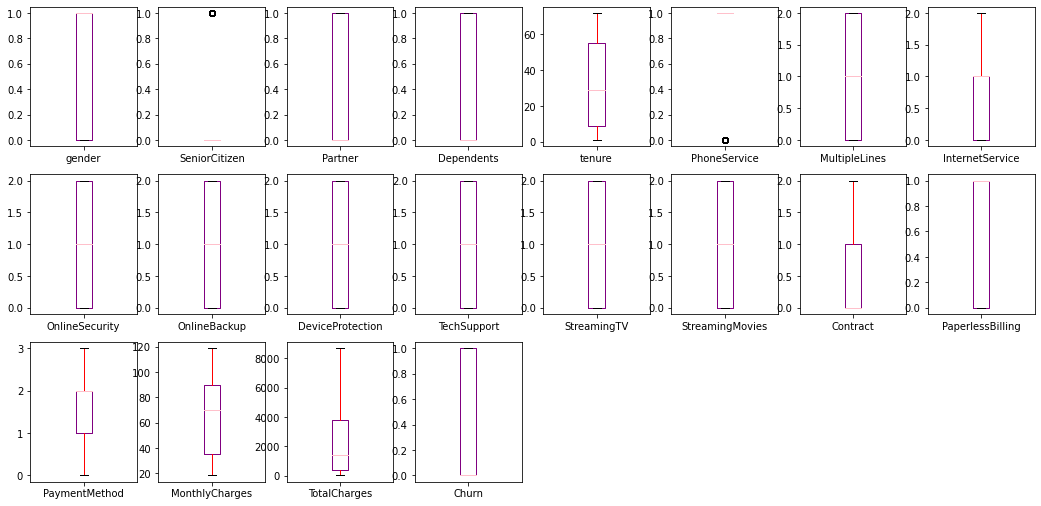

In [174]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df.plot(kind="box",subplots=True,layout=(6,8),figsize=(18,18),color=color)

In the above plot, we can see that there are no outliers present in the above dataset.

<AxesSubplot:>

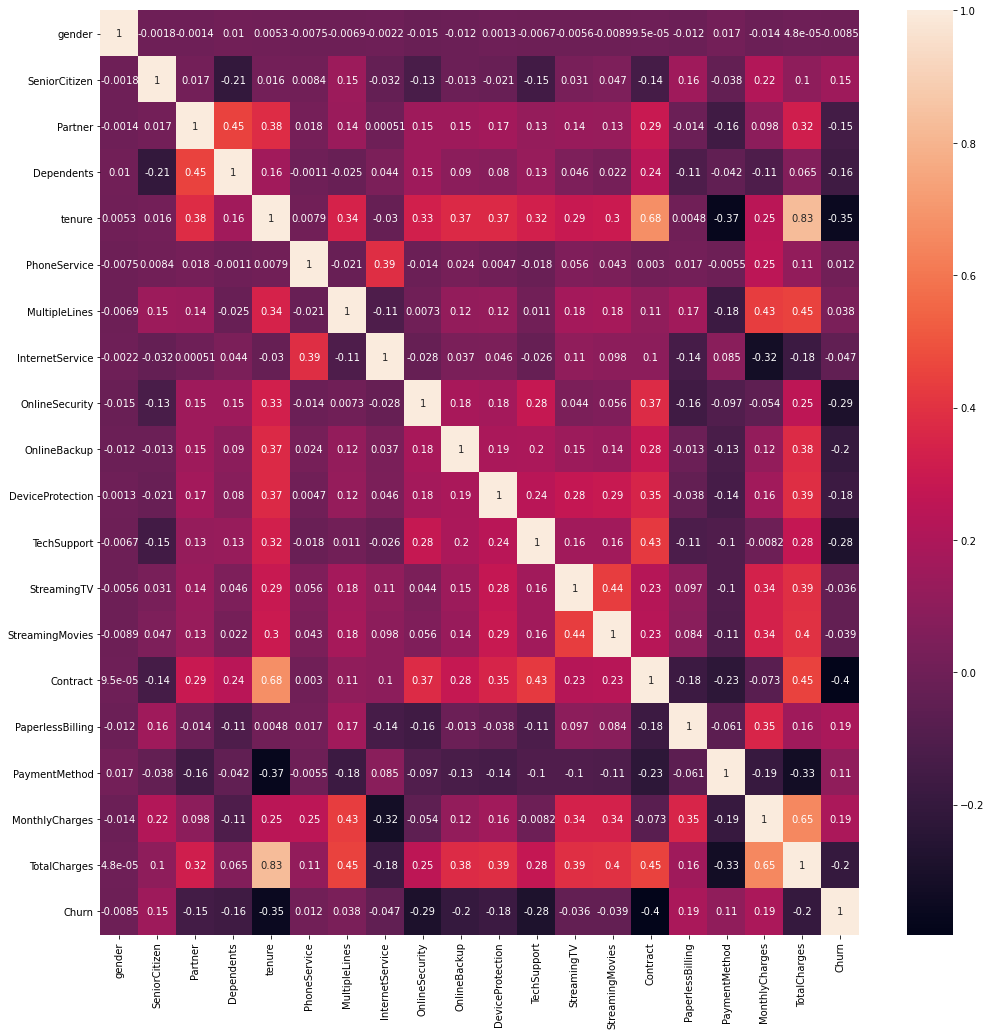

In [175]:
plt.figure(figsize=(17,17))
sns.heatmap(df.corr(),annot=True)

In the above plot we can see that,
1. Tenure, online security, techsupport, contract are the contributing negetivly towards predicting the churn.
2. Tenure and total charges are positivly corelated to each other.
3. Tenure and Contract are positivly corelated to each other.

In [176]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In the above plot we can say that,
1. mean is more than 50% of data which shows that slight skewness is present.
2. 75% and max values doesnt have much difference we can say that outliers are not present.

# Skewness and Outliers

In [177]:
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

We could see that skewness is present in the dataset for which we will be using yeo-johnson transformation method.

# Dividing the dataset into Independent(X) and Dependent(Y) variable

In [178]:
x=df.iloc[:,:-1]  #independent variable
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [179]:
y=df.iloc[:,-1]   #dependent variable.
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

# VIF FACTOR

In [180]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

We will be calculating the VIF Factor to check the presence of multicollinearities.

In [181]:
cal_vif(x)

,variables,VIF FACTOR
0,gender,1.954535
1,SeniorCitizen,1.369954
2,Partner,2.819229
3,Dependents,1.957360
4,tenure,15.084412
5,PhoneService,15.150758
6,MultipleLines,2.756988
7,InternetService,4.350001
8,OnlineSecurity,2.247863
9,OnlineBackup,2.455913


# Power Transformation and Standard Scaling

In [182]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')  #to remove skewness
x

array([[-1.00943013, -0.44032709,  1.03561683, ...,  0.4110058 ,
        -1.15999612, -1.81006854],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.32047796,
        -0.24134546,  0.25425652],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.32047796,
        -0.34453193, -1.38609098],
       ...,
       [-1.00943013, -0.44032709,  1.03561683, ...,  0.4110058 ,
        -1.16868516, -0.85839282],
       [ 0.99065797,  2.27103902,  1.03561683, ...,  1.32047796,
         0.33273687, -0.92147688],
       [ 0.99065797, -0.44032709, -0.9656081 , ..., -1.48978043,
         1.33845304,  1.48336977]])

In [183]:
from sklearn.preprocessing import StandardScaler
mn=StandardScaler()  #performing standard scaling to bring them on the same scale.
x=mn.fit_transform(x)
x

array([[-1.00943013, -0.44032709,  1.03561683, ...,  0.4110058 ,
        -1.15999612, -1.81006854],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.32047796,
        -0.24134546,  0.25425652],
       [ 0.99065797, -0.44032709, -0.9656081 , ...,  1.32047796,
        -0.34453193, -1.38609098],
       ...,
       [-1.00943013, -0.44032709,  1.03561683, ...,  0.4110058 ,
        -1.16868516, -0.85839282],
       [ 0.99065797,  2.27103902,  1.03561683, ...,  1.32047796,
         0.33273687, -0.92147688],
       [ 0.99065797, -0.44032709, -0.9656081 , ..., -1.48978043,
         1.33845304,  1.48336977]])

In [184]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

# SMOTE

In [209]:
from imblearn.combine import SMOTEENN
smt=SMOTEENN()      #SMOTE to balance the target variable.
x_res,y_res=smt.fit_resample(x,y)

we will be performing the combination of upsampling and downsampling i.e SMOTEENN meothod to make the dataset balanced.

In [210]:
y_res.value_counts()

1    3462
0    2835
Name: Churn, dtype: int64

# Perfroming Algorithms

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [212]:
maxacc=0  #finding the best random state
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.30,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxacc:
        maxacc=accu
        maxrs=i
print("best accuracy is",round(maxacc,2),"at random state",maxrs)

best accuracy is 0.92 at random state 118


In [213]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_res,y_res,test_size=.30,random_state=118)

# Logistic Regression

In [214]:
lm=LogisticRegression()
lm.fit(x_train1,y_train1)
pred=lm.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 0.9232804232804233
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       818
           1       0.94      0.93      0.93      1072

    accuracy                           0.92      1890
   macro avg       0.92      0.92      0.92      1890
weighted avg       0.92      0.92      0.92      1890



# Decision Tree Classifier

In [215]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)
pred=dtc.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 0.9365079365079365
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       818
           1       0.95      0.93      0.94      1072

    accuracy                           0.94      1890
   macro avg       0.93      0.94      0.94      1890
weighted avg       0.94      0.94      0.94      1890



# Random Forest Classifier

In [216]:
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)
pred=rf.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))

Accuracy Score 96.46
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       818
           1       0.97      0.97      0.97      1072

    accuracy                           0.96      1890
   macro avg       0.96      0.96      0.96      1890
weighted avg       0.96      0.96      0.96      1890



# K Neighbors Classifier

In [217]:
knn=KNeighborsClassifier()
knn.fit(x_train1,y_train1)
pred=knn.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))


Accuracy Score 93.97
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       818
           1       0.92      0.97      0.95      1072

    accuracy                           0.94      1890
   macro avg       0.94      0.93      0.94      1890
weighted avg       0.94      0.94      0.94      1890



# Cross Validation Score

In [218]:
print(cross_val_score(lm,x_res,y_res,cv=5).mean()) #logistic regression

0.9112260927669983


In [219]:
print(cross_val_score(knn,x_res,y_res,cv=5).mean()) #kneighbors classifier

0.9507698223583848


In [220]:
print(cross_val_score(dtc,x_res,y_res,cv=5).mean()) #decision tree calssifier

0.935211871351665


In [221]:
print(cross_val_score(rf,x_res,y_res,cv=5).mean()) #random forest classifier

0.964589306201697


On comparing the accuracy scores and cross validation scores we could see the random forest is giving us the best results as there is no difference between the cross val scores and accuracy score of randome forest.

# ROC_AUC SCORE

In [222]:
y_pred_prob=rf.predict_proba(x_test1)[:,1]
y_pred_prob

array([0.17, 0.95, 0.23, ..., 0.02, 1.  , 0.49])

In [223]:
fpr,tpr,thresholds=roc_curve(y_test1,y_pred_prob)

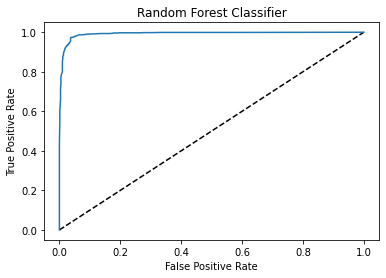

In [224]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.show()

In [225]:
auc_score=roc_auc_score(y_test1,rf.predict(x_test1))
auc_score

0.9644051290004744

the auc_roc score is almost equal to the accuracy score

# Hyper Parameter Tunning using Grid Search CV

In [226]:
parameter={"criterion":['gini','entropy'],
           "max_depth":np.arange(2,20),
          "max_features":["auto","log2","sqrt"],
          "bootstrap":[True,False],
          "oob_score":[True,False]}

In [227]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [204]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'oob_score': [True, False]})

In [205]:
gcv.best_params_ 

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'oob_score': False}

# Final Model

In [228]:
final=RandomForestClassifier(criterion="entropy",max_depth=15,bootstrap=False,max_features="sqrt",oob_score=False)
final.fit(x_train1,y_train1)
pred=final.predict(x_test1)
print("Accuracy Score",accuracy_score(y_test1,pred))
print("Classification Report\n",classification_report(y_test1,pred))
print(confusion_matrix(y_test1,pred))

Accuracy Score 0.9656084656084656
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       818
           1       0.97      0.97      0.97      1072

    accuracy                           0.97      1890
   macro avg       0.96      0.97      0.96      1890
weighted avg       0.97      0.97      0.97      1890

[[ 787   31]
 [  34 1038]]


# Saving the Model

In [207]:
import joblib
joblib.dump(final,"telecom.pkl")

['telecom.pkl']